In [2]:
import os
import sys
import time
import itertools
import cv2
import numpy as np
import ujson as json
import matplotlib.pyplot as plt

nfs_dir = '/home/nfs/zpahuja2/tracking_from_colorization'
sys.path.append(nfs_dir)

import colorizer as clr

from IPython.display import Image

In [2]:
from importlib import reload
reload(clr)

<module 'colorizer' from '/home/nfs/zpahuja2/tracking_from_colorization/colorizer/__init__.py'>

# Read MP4/ Image Folder and Write GIF

### .MP4

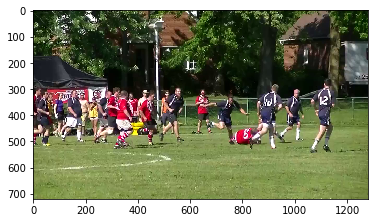

In [3]:
video = clr.utils.io.reader("/data/zubin/videos/kinetics/processed/003bW5kHjZU.mp4")
images = []
for img in video:
    images.append(img)
plt.imshow(images[0])

### Dir

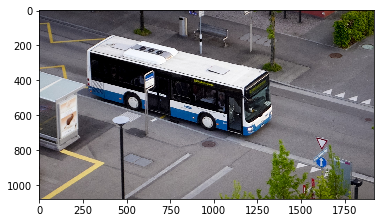

In [4]:
vid = clr.utils.io.reader(os.path.join(nfs_dir, "out/bus"))
imgs = []
for i, img in enumerate(vid):
    imgs.append(img)
plt.imshow(imgs[0])

### Write GIF

In [5]:
gif_path = os.path.join(nfs_dir, "out", "example.gif")
clr.utils.io.GifWriter(gif_path).write(vid, images_color_space='RGB')

### Write MP4

In [6]:
path = os.path.join(nfs_dir, "out", "bus.mp4")
w = clr.utils.io.VideoWriter(path)
w.write(images, images_color_space='RGB')

### Write to Dir

In [7]:
path = os.path.join(nfs_dir, "out", "bus2")
w = clr.utils.io.ImageWriter(path)
w.write(images, images_color_space='RGB')

In [1]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
np.stack([np.empty([256,256,1]), np.empty([256,256,1]), np.empty([256,256,1])] + [np.empty([256,256,1])], axis=0).shape

(4, 256, 256, 1)

In [3]:
# Assume batch size is 1
def generator(sequence_type):
    for i in range(5):
        yield np.stack([np.empty([256,256,1]), np.empty([256,256,1]), np.empty([256,256,1])] + [np.empty([256,256,1])], axis=0).shape

dataset = tf.data.Dataset.from_generator(generator, tf.int32)

In [4]:
X = tf.constant([[[1,2,3],[3,4,5]],[[3,4,5],[5,6,7]]])
Y = tf.constant([[[11]],[[12]]])
dataset2 = tf.data.Dataset.from_tensor_slices((X, Y))

In [6]:
iterator = dataset.make_one_shot_iterator()
for x, y in iterator:
    print(x, y)
    break

InvalidArgumentError: TypeError: generator() missing 1 required positional argument: 'sequence_type'
Traceback (most recent call last):

  File "/home/nfs/zpahuja2/.local/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 296, in get_iterator
    return self._iterators[iterator_id]

KeyError: 0


During handling of the above exception, another exception occurred:


Traceback (most recent call last):

  File "/home/nfs/zpahuja2/.local/lib/python3.6/site-packages/tensorflow/python/ops/script_ops.py", line 206, in __call__
    ret = func(*args)

  File "/home/nfs/zpahuja2/.local/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 416, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/nfs/zpahuja2/.local/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 298, in get_iterator
    iterator = iter(self._generator(*self._args.pop(iterator_id)))

TypeError: generator() missing 1 required positional argument: 'sequence_type'


	 [[Node: PyFunc = PyFunc[Tin=[DT_INT64], Tout=[DT_INT32], token="pyfunc_1"](arg0)]] [Op:IteratorGetNextSync]

In [ ]:
[np.random.randint(100, size=(256,256,1)) for ]

In [ ]:
np.stack(np.random.random(3,256,256,1) + np.random.random(1,256,256,1), axis=0).shape

In [ ]:
np.stack([np.empty(256,256,1), np.empty(256,256,1), np.empty(256,256,1)] + [np.empty(1,256,256,1)], axis=0).shape

In [ ]:
# Assume batch size is 1
def generator(sequence_type):
    if sequence_type == 1:
        for i in range(5):
            yield 10 + i
    elif sequence_type == 2:
        for i in range(5):
            yield (30 + 3 * i, 60 + 2 * i)
    elif sequence_type == 3:
        for i in range(1, 4):
            yield (i, ['Hi'] * i)

dataset1 = tf.data.Dataset.from_generator(generator, (tf.int32), args = ([1]))
# Emits data of 10, 11, 12, 13, 14, (One element at a time)

dataset2 = tf.data.Dataset.from_generator(generator, (tf.int32, tf.int32), args = ([2]))
# Emits data of (30, 60), (33, 62), (36, 64), (39, 66), (42, 68)
# Emits one tuple at a time

dataset3 = tf.data.Dataset.from_generator(generator, (tf.int32, tf.string), args = ([3]))
# Emits data of (1, ['Hi']), (2, ['Hi', 'Hi']), (3, ['Hi', 'Hi', 'Hi'])
# Emits one tuple at a time

# PROTO

In [3]:
from scripts.colorization.train import dataflow
import tensorpack.dataflow as df
from colorizer.config import Config
cfg = Config()

In [4]:
centroids = np.load(os.path.join(nfs_dir, 'out/centroids/centroids_16k_kinetics_10000samples.npy'))

In [8]:
data = dataflow(centroids, num_refs=3,
                    num_process=16, shuffle=False)
# data = df.MapData(data, tuple)

[0420 17:03:29 @parallel.py:193] [MultiProcessPrefetchData] Will fork a dataflow more than one times. This assumes the datapoints are i.i.d.
PrefetchDataZMQ successfully cleaned-up.


In [10]:
data.reset_state()

In [11]:
for dp in data:
    print(type(dp))
    print(dp[0].shape)
    break

<class 'list'>
(4, 256, 256, 1)
